In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()



# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]

In [25]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [26]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [30]:
x = pd.DataFrame(housing.data, columns = housing.feature_names)

y = pd.DataFrame(housing.target, columns = housing.target_names)

In [31]:
x.shape

(20640, 8)

In [32]:
y.shape

(20640, 1)

In [33]:
x = np.array(x)
y = np.array(y)

In [34]:
one = np.ones((x.shape[0], 1))

In [35]:
x = np.hstack((one, x))

In [36]:
x.shape

(20640, 9)

In [37]:
def hypothesis(X, theta):
    
    y_ = 0
    n = x.shape[1]
    for i in range(n):
        
        y_ += theta[i]*X[i] 
    return y_   

In [38]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss += (y_p - y_gt)**2
        return total_loss/m


In [49]:
def gradient(X, Y, theta):
    
    m = X.shape[0]
    n = x.shape[1]
    
    grad = np.zeros((n,))
    
    for i in range(n):
        
        for j in range(m):
            
            y_p = hypothesis(X[j], theta)
            
            y_gt = Y[i]
            
            grad[i] += (y_p - y_gt)*X[j][i]
            
    return grad/m


In [53]:
def gradient_descent(X, Y, learning_rate = 0.003, epochs = 100):
    
    m,n = X.shape
    theta = np.zeros((n,))
    
    cost_epoch = []
    
    for i in range(epochs):
        
        loss = cost(X, Y, theta)
        
        grad = gradient(X, Y, theta)
        
        cost_epoch.append(loss)
        
        for j in range(n):
            theta[j] = theta[j] - learning_rate * grad[j]
            
        print("Updated value of theta", theta[j])    
    return theta, cost_epoch

In [54]:
theta , cost_epoch = gradient_descent(x_train, y_train, learning_rate=0.3, epochs = 10)

Updated value of theta -81.31672540364767
Updated value of theta 58975477.73236372
Updated value of theta -58409356255969.28
Updated value of theta 5.789650373459409e+19
Updated value of theta -5.738824774422291e+25
Updated value of theta 5.6884453762647e+31
Updated value of theta -5.638508243564408e+37
Updated value of theta 5.589009493771477e+43
Updated value of theta -5.539945278455636e+49
Updated value of theta 5.491311782970757e+55


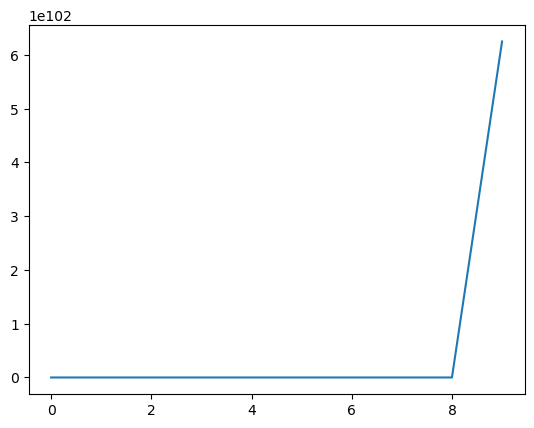

In [55]:
(theta), cost_epoch

plt.plot(cost_epoch)

In [15]:
x_train = x[:20000]
y_train = y[:20000]
x_test = x[20000:]
y_test = y[20000:]

In [56]:
theta

array([-4.59891275e+53, -1.78097856e+54, -1.18794066e+55, -2.42633833e+54,
       -4.93068679e+53, -1.06370347e+57, -1.68260364e+54, -1.63019638e+55,
        5.49131178e+55])

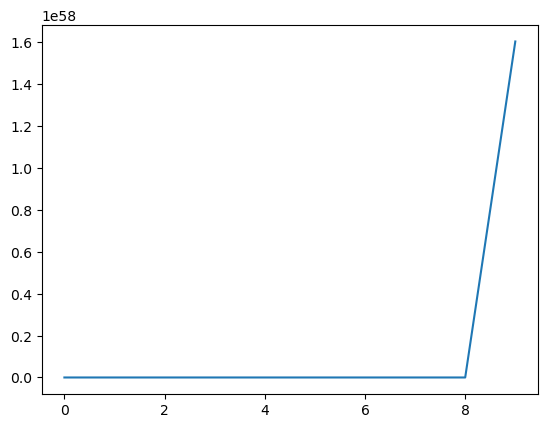

In [110]:
plt.plot(cost_epoch)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [58]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=92)

In [62]:
model = LinearRegression()

In [63]:
model

LinearRegression()

In [64]:
model.fit(x_train, y_train)

LinearRegression()

In [66]:
pred = model.predict(x_test)

In [67]:
pred == y_test

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
r2_score(y_test, pred)

0.6056204366307272

In [71]:
model.predict([x_test[0]])

array([[2.20769307]])

In [72]:
pred[0]

array([2.20769307])

In [85]:
model.predict([[ 1.00000000e+00,  3.35530000e+00,  2.10000000e+01,  5.51751592e+00,
        1.01751592e+00,  2.29200000e+03,  3.64968153e+00,  3.40700000e+01,
       -1.17450000e+02]])

array([[1.45168505]])

In [73]:
x_test[0]

array([ 1.00000000e+00,  3.37500000e+00,  4.60000000e+01,  4.68750000e+00,
        1.04276316e+00,  1.14000000e+03,  3.75000000e+00,  3.39700000e+01,
       -1.18300000e+02])

In [80]:
x_train[0]

array([ 1.00000000e+00,  3.35530000e+00,  2.10000000e+01,  5.51751592e+00,
        1.01751592e+00,  2.29200000e+03,  3.64968153e+00,  3.40700000e+01,
       -1.17450000e+02])

In [86]:
mean_absolute_error(y_test, pred)

0.539159801570426

In [87]:
mean_squared_error(y_test, pred)

0.5379463896382394

In [88]:
np.sqrt(mean_squared_error(y_test, pred))

0.7334482869556922